In [14]:
import numpy as np
import matplotlib.pyplot as plt
#from  import emg_filt i



In [15]:
emg_filt = np.load("data/processed/Hand_open_emg_filtered.npy")

print("Filtered EMG shape:", emg_filt.shape)
# samples and channels


Filtered EMG shape: (57919, 5)


In [16]:
fs = 1000          # in hz
window_ms = 200    # milliseconds
overlap = 0.5

win_len = int(window_ms * fs / 1000)   # samples
step = int(win_len * (1 - overlap))

print("Window length:", win_len)
print("Step size:", step)


Window length: 200
Step size: 100


In [17]:
def create_windows(signal, win_len, step):
    windows = []
    for start in range(0, signal.shape[0] - win_len + 1, step):
        window = signal[start:start + win_len, :]
        windows.append(window)
    return np.array(windows)


In [18]:
X = create_windows(emg_filt, win_len, step)

print("Windowed data shape:", X.shape)


Windowed data shape: (578, 200, 5)


In [19]:
label_name = "hand_open"
label_map = {"hand_open": 0}

y = np.full(X.shape[0], label_map[label_name])

print("Labels shape:", y.shape)
print("Unique labels:", np.unique(y))


Labels shape: (578,)
Unique labels: [0]


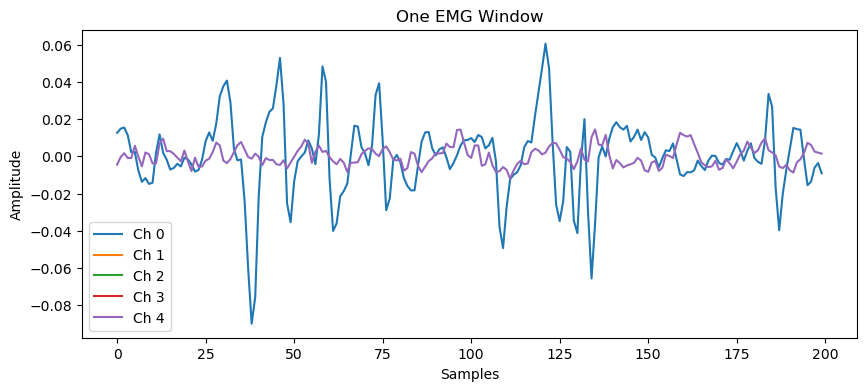

In [21]:
idx = 10  # any window index

plt.figure(figsize=(10,4))
for ch in range(X.shape[2]):
    plt.plot(X[idx, :, ch], label=f"Ch {ch}")

plt.title("One EMG Window")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
